In [ ]:
!gdown "https://drive.google.com/file/d/1p1EVxyXbA33ojHZ_Qzc010hcRJ_dfKr_/view?usp=drive_link" -O teleCust1000t.csv

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1p1EVxyXbA33ojHZ_Qzc010hcRJ_dfKr_
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1p1EVxyXbA33ojHZ_Qzc010hcRJ_dfKr_/view?usp=drive_link
To: /content/teleCust1000t.csv
51.6kB [00:00, 35.9MB/s]


In [ ]:
import pandas as pd
file_path = '/content/teleCust1000t.csv'
df = pd.read_csv("/content/teleCust1000t.csv", sep=",")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [ ]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


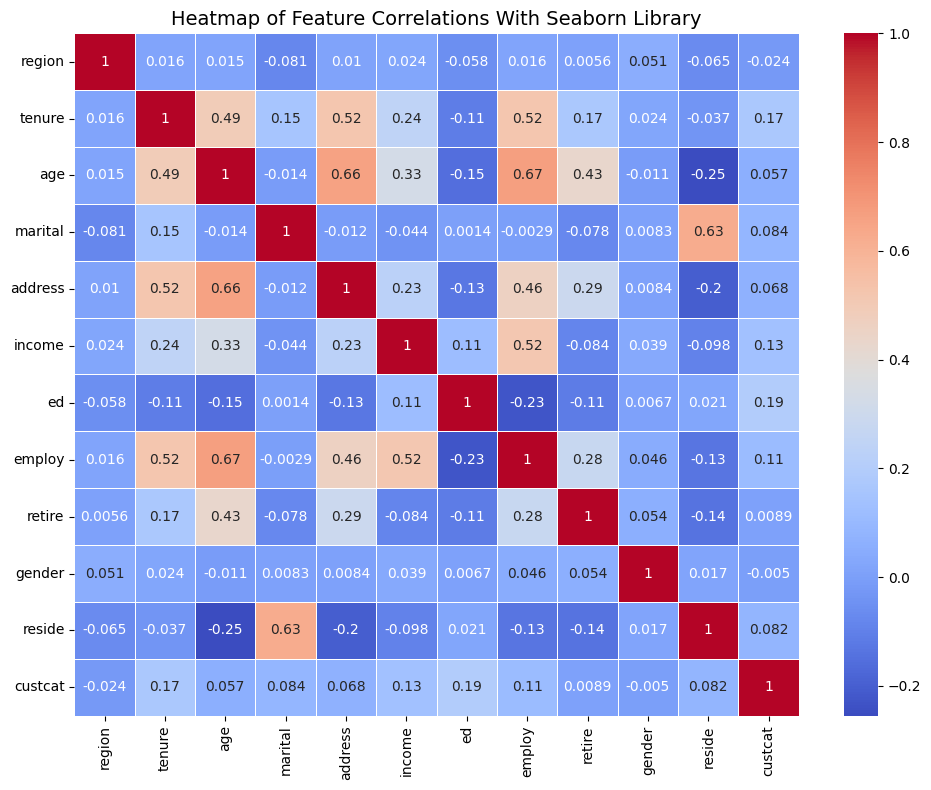

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations With Seaborn Library', fontsize=14)
plt.tight_layout()
plt.savefig('/content/HeatmapofFeatureCorrelationsWithSeabornLibrary.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import plotly.express as px


fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Interactive Correlation Heatmap With Plotly Library'
)
fig.update_layout(width=800, height=700, margin=dict(l=50, r=50, t=80, b=50))

fig.show()


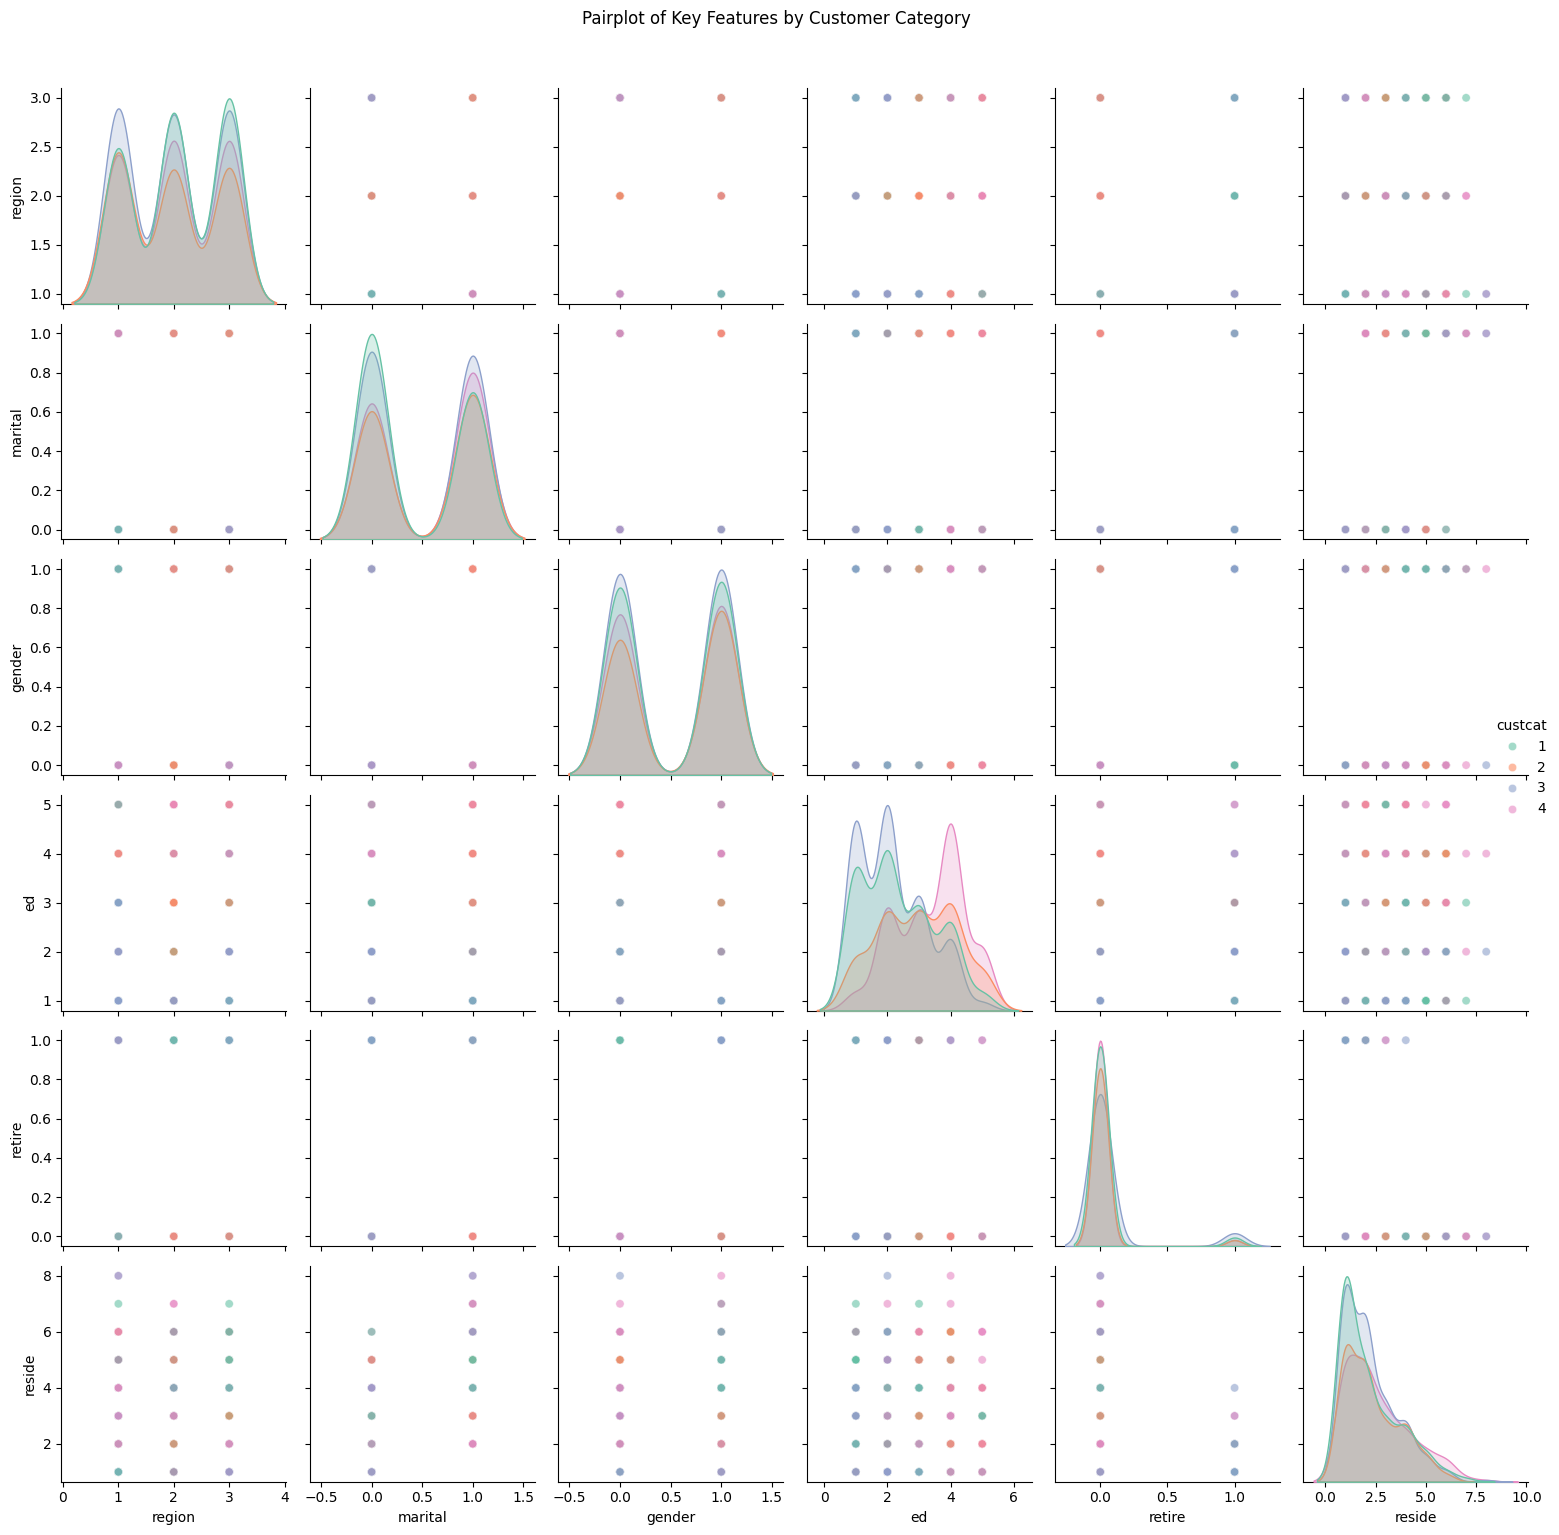

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['region','marital','gender','ed','retire','reside','custcat']

g = sns.pairplot(df[features], hue='custcat', palette='Set2', diag_kind='kde', plot_kws={'alpha':0.6})


g.fig.suptitle('Pairplot of Key Features by Customer Category', y=1.02)
plt.tight_layout()

g.savefig('/content/pairplot_custcat.png', dpi=300, bbox_inches='tight')

plt.show()

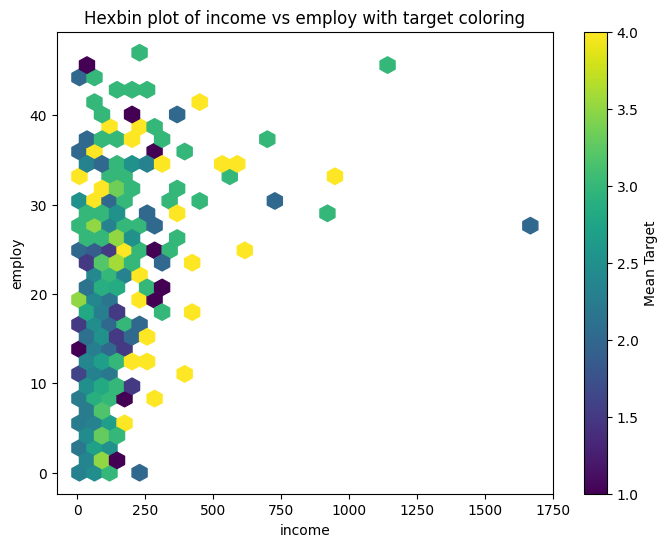

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = df['income']
y = df['employ']
c = df['custcat']

plt.figure(figsize=(8,6))

hb = plt.hexbin(x, y, gridsize=30, cmap='viridis', C=c, reduce_C_function=np.mean)
plt.colorbar(hb, label='Mean Target')

plt.xlabel('income')
plt.ylabel('employ')
plt.title('Hexbin plot of income vs employ with target coloring')
plt.savefig('/content/Hexbinplot.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-3827419923.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




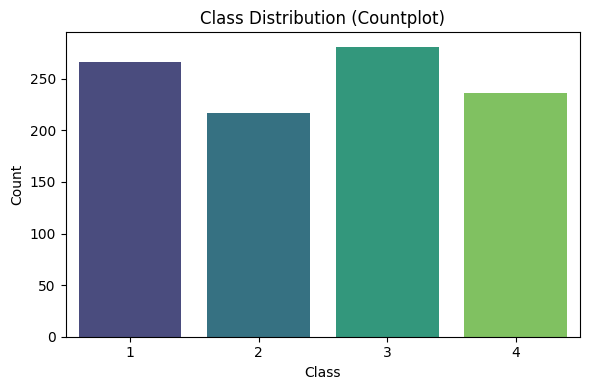

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_col = 'custcat'

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Class Distribution (Countplot)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('/content/countplot.png', dpi=300, bbox_inches='tight')
plt.show()

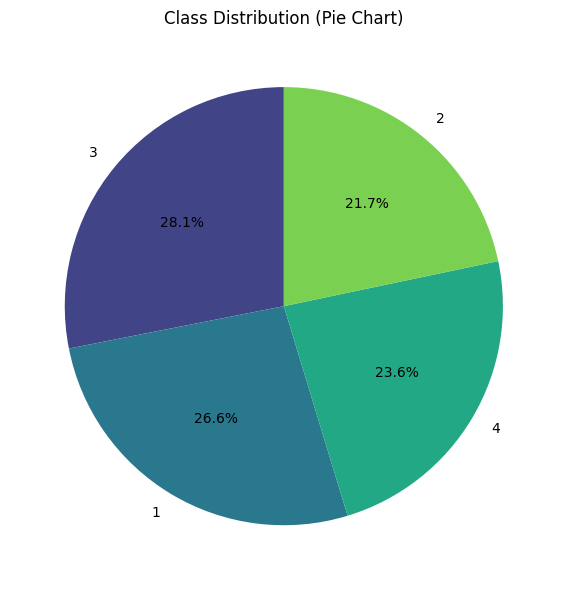

In [ ]:
class_counts = df[target_col].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(class_counts))
)
plt.title('Class Distribution (Pie Chart)')
plt.tight_layout()
plt.savefig('/content/piechart.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

target_col = 'custcat'

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col != target_col]

df_normalized = df.copy()

scaler = MinMaxScaler()
df_normalized[numeric_features] = scaler.fit_transform(df[numeric_features])

df_normalized.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,0.5,0.169014,0.440678,1.0,0.163636,0.033153,0.75,0.106383,0.0,0.0,0.142857,1
1,1.0,0.140845,0.254237,1.0,0.127273,0.076552,1.00,0.106383,0.0,0.0,0.714286,4
2,1.0,0.943662,0.576271,1.0,0.436364,0.064497,0.00,0.617021,0.0,1.0,0.142857,3
3,0.5,0.450704,0.254237,0.0,0.218182,0.014467,0.25,0.000000,0.0,1.0,0.000000,1
4,0.5,0.309859,0.203390,1.0,0.163636,0.012658,0.00,0.042553,0.0,0.0,0.428571,3


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import RFE


target_col = 'custcat'


selected_features = ['region', 'marital', 'gender', 'ed', 'retire', 'reside']


X = df_normalized[selected_features]
y = df_normalized[target_col]



lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

lasso_coef = pd.Series(lasso.coef_, index=X.columns)
important_features_lasso = lasso_coef[lasso_coef != 0].sort_values(ascending=False)
print("Important Features With Lasso Regression:")
print(important_features_lasso)

Important Features With Lasso Regression:
ed         0.603171
marital    0.147239
dtype: float64


In [ ]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

rfe_features = X.columns[selector.support_]
print("Important Features With RFE:")
print(rfe_features)

Important Features With RFE:
Index(['ed', 'retire', 'reside'], dtype='object')


Train model and evaluation(RFE)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_rfe = X[rfe_features]
y = df_normalized['custcat']


X_train, X_test, y_train, y_test = train_test_split(
    X_rfe, y, test_size=0.1, random_state=42, stratify=y
)

print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")



logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTrain Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))


Train: 900, Test: 100

Test Accuracy: 0.45

Train Accuracy: 0.36444444444444446
Test Confusion Matrix:
 [[ 6  0 11  9]
 [ 3  0 11  8]
 [ 4  0 22  2]
 [ 2  0  5 17]]

Classification Report (Test):
               precision    recall  f1-score   support

           1       0.40      0.23      0.29        26
           2       0.00      0.00      0.00        22
           3       0.45      0.79      0.57        28
           4       0.47      0.71      0.57        24

    accuracy                           0.45       100
   macro avg       0.33      0.43      0.36       100
weighted avg       0.34      0.45      0.37       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

coef_df = pd.DataFrame(logreg.coef_, columns=X_train.columns)


coef_df['bias'] = logreg.intercept_

coef_df.insert(0, 'class', logreg.classes_)

print("🔹 Logistic Regression Coefficients by Class:\n")
print(coef_df)

🔹 Logistic Regression Coefficients by Class:

   class        ed    retire    reside      bias
0      1 -1.034495 -0.143629 -0.535953  0.649686
1      2  0.741347 -0.355602  0.087600 -0.399004
2      3 -1.483760  0.429354 -0.307495  0.772063
3      4  1.776908  0.069877  0.755847 -1.022745


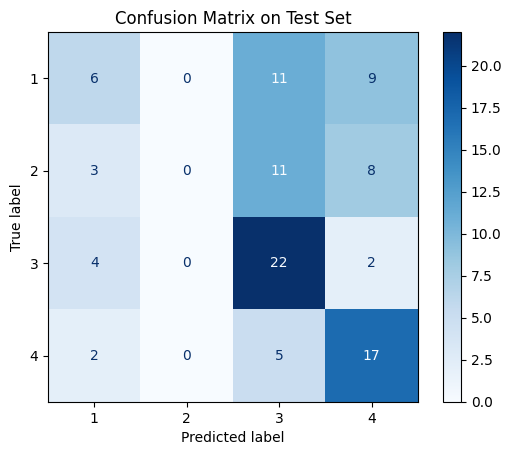

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.savefig('/content/confusionRfe.png', dpi=300, bbox_inches='tight')
plt.show()

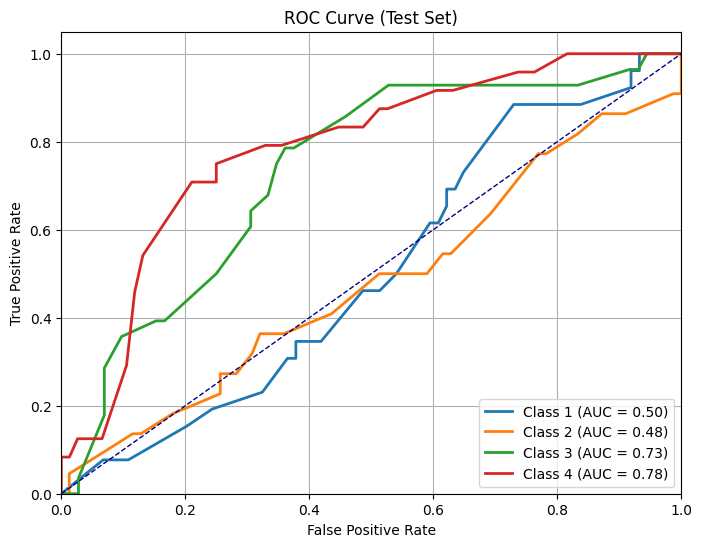


Macro-average AUC on Test Set: 0.625


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score


y_test_bin = label_binarize(y_test, classes=logreg.classes_)
n_classes = y_test_bin.shape[1]


y_score = logreg.predict_proba(X_test)


plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {logreg.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.grid("True")
plt.savefig('/content/AUCROCRFE.png', dpi=300, bbox_inches='tight')
plt.show()


auc_score = roc_auc_score(y_test_bin, y_score, average='macro')
print(f"\nMacro-average AUC on Test Set: {auc_score:.3f}")


Train model and evaluation(Lasso Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_rfe = df_normalized[['ed', 'marital']]

y = df_normalized['custcat']

X_train, X_test, y_train, y_test = train_test_split(
    X_rfe, y, test_size=0.1, random_state=42, stratify=y
)

print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")




logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTrain Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))


Train: 900, Test: 100

Test Accuracy: 0.41

Train Accuracy: 0.36666666666666664
Test Confusion Matrix:
 [[ 7  0  9 10]
 [ 7  0  6  9]
 [ 9  0 17  2]
 [ 3  0  4 17]]

Classification Report (Test):
               precision    recall  f1-score   support

           1       0.27      0.27      0.27        26
           2       0.00      0.00      0.00        22
           3       0.47      0.61      0.53        28
           4       0.45      0.71      0.55        24

    accuracy                           0.41       100
   macro avg       0.30      0.40      0.34       100
weighted avg       0.31      0.41      0.35       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

coef_df = pd.DataFrame(logreg.coef_, columns=X_train.columns)


coef_df['bias'] = logreg.intercept_

coef_df.insert(0, 'class', logreg.classes_)

print("🔹 Logistic Regression Coefficients by Class:\n")
print(coef_df)

🔹 Logistic Regression Coefficients by Class:

   class        ed   marital      bias
0      1 -1.041500 -0.325390  0.697060
1      2  0.774520  0.165056 -0.495850
2      3 -1.516567 -0.027211  0.765593
3      4  1.783547  0.187544 -0.966803


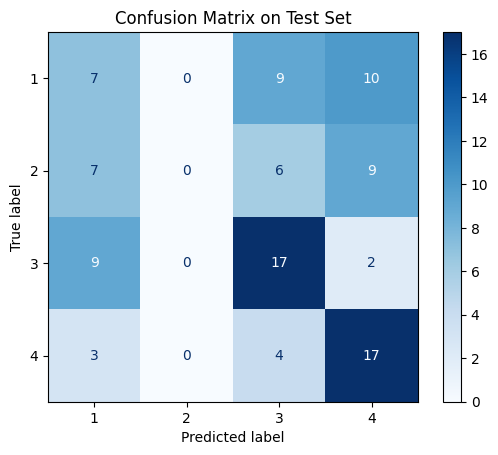

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score
)

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.savefig('/content/confusionLasoo.png', dpi=300, bbox_inches='tight')
plt.show()

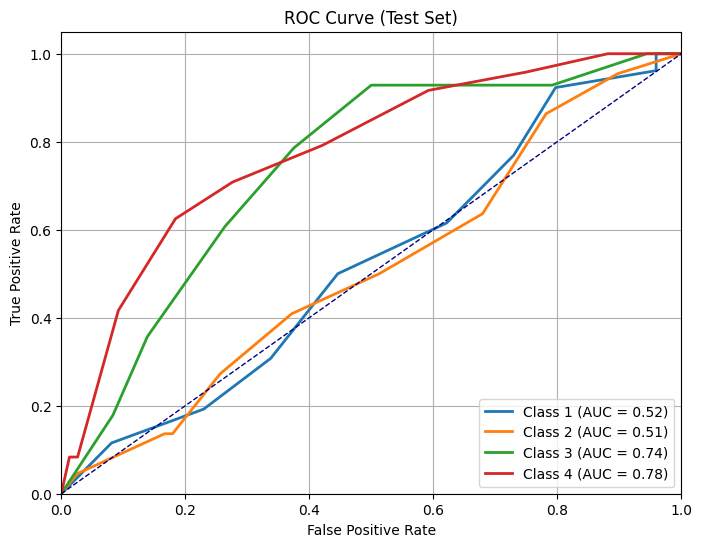


Macro-average AUC on Test Set: 0.638


In [ ]:
y_test_bin = label_binarize(y_test, classes=logreg.classes_)
n_classes = y_test_bin.shape[1]


y_score = logreg.predict_proba(X_test)

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {logreg.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.grid("True")
plt.savefig('/content/AUCROCLasoo.png', dpi=300, bbox_inches='tight')
plt.show()


auc_score = roc_auc_score(y_test_bin, y_score, average='macro')
print(f"\nMacro-average AUC on Test Set: {auc_score:.3f}")

PCA

Explained Variance Ratio: [0.28627756 0.15034329]
Total Variance Explained: 0.4366208512505969


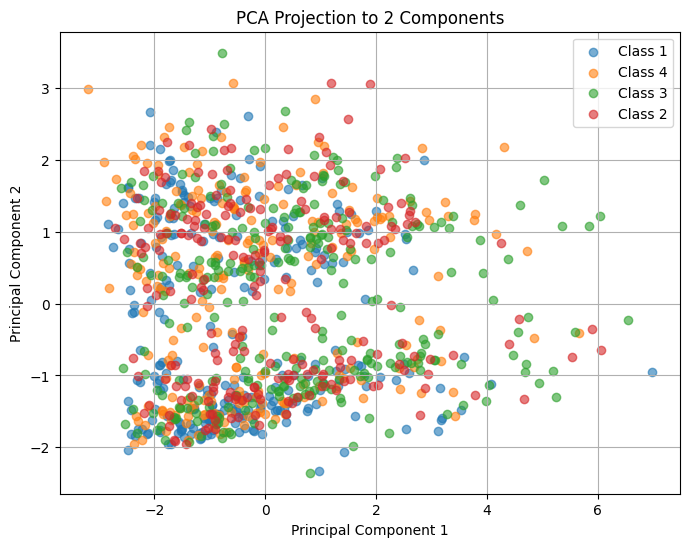

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = ['region', 'tenure', 'age', 'marital', 'address',
            'income', 'ed', 'employ', 'retire', 'gender', 'reside']

X = df[features]
y = df['custcat']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['custcat'] = y.values


print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))


plt.figure(figsize=(8,6))
for label in pca_df['custcat'].unique():
    subset = pca_df[pca_df['custcat'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label}', alpha=0.6)

plt.title('PCA Projection to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('/content/PCA.png', dpi=300, bbox_inches='tight')
plt.show()


LDA

Explained Variance Ratio: [0.64491239 0.28948965]
Total Variance Explained: 0.9344020385088745


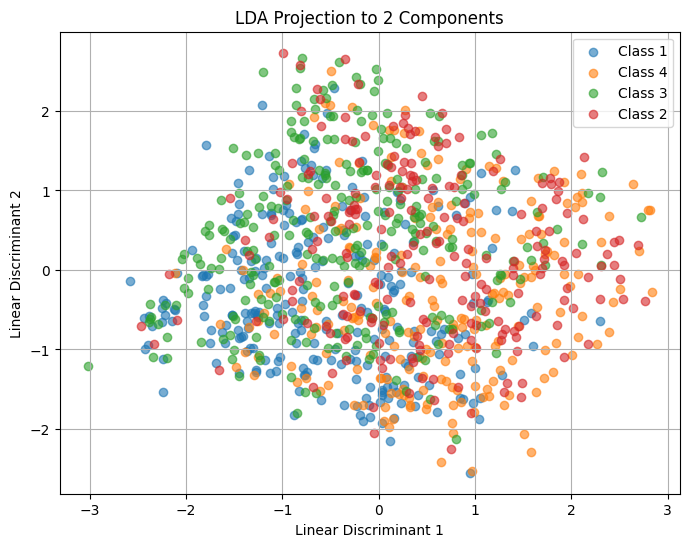

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt


features = ['region', 'tenure', 'age', 'marital', 'address',
            'income', 'ed', 'employ', 'retire', 'gender', 'reside']

X = df[features]
y = df['custcat']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
lda_df['custcat'] = y.values

explained_ratio = lda.explained_variance_ratio_
print("Explained Variance Ratio:", explained_ratio)
print("Total Variance Explained:", sum(explained_ratio))

plt.figure(figsize=(8,6))
for label in lda_df['custcat'].unique():
    subset = lda_df[lda_df['custcat'] == label]
    plt.scatter(subset['LD1'], subset['LD2'], label=f'Class {label}', alpha=0.6)

plt.title('LDA Projection to 2 Components')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend()
plt.grid(True)
plt.savefig('/content/LDA.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

X = df[features]
y = df['custcat']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


y_cat = to_categorical(y - 1)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat,
                                                    test_size=0.1, random_state=42)


model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(5),
    Dense(4),
    Dense(3),
    Dense(2),
    Dense(4,activation='softmax')
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2372 - loss: 1.5796 - val_accuracy: 0.1500 - val_loss: 1.5069
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2395 - loss: 1.4547 - val_accuracy: 0.1600 - val_loss: 1.4628
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2430 - loss: 1.4265 - val_accuracy: 0.1900 - val_loss: 1.4437
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2412 - loss: 1.4091 - val_accuracy: 0.2000 - val_loss: 1.4279
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2386 - loss: 1.3961 - val_accuracy: 0.1900 - val_loss: 1.4140
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2816 - loss: 1.3915 - val_accuracy: 0.2000 - val_loss: 1.4094
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2809 - loss: 1.3793 - val_accuracy: 0.2200 - val_loss: 1.4048
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2888 - loss: 1.3849 - val_accuracy: 0.2600 -

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


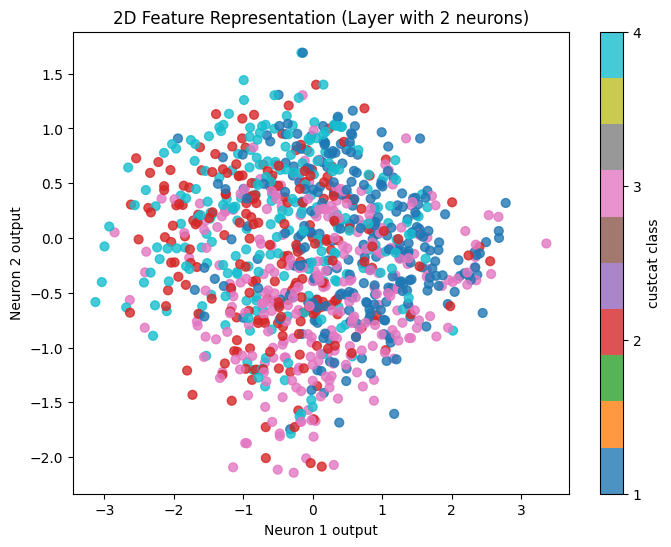

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


intermediate_layer_model = Model(inputs=model.layers[0].input,
                                 outputs=model.layers[-2].output)

X_2D = intermediate_layer_model.predict(X_scaled)


y_labels = np.argmax(y_cat, axis=1)


plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2D[:,0], X_2D[:,1],
                      c=y_labels, cmap='tab10', s=40, alpha=0.8)
plt.title('2D Feature Representation (Layer with 2 neurons)')
plt.xlabel('Neuron 1 output')
plt.ylabel('Neuron 2 output')


cbar = plt.colorbar(scatter)
cbar.set_label('custcat class')
cbar.set_ticks([0,1,2,3])
cbar.set_ticklabels(['1','2','3','4'])
plt.savefig('/content/MLPprojection.png', dpi=300, bbox_inches='tight')
plt.show()
